In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the csv file
df = pd.read_csv("Loan_Pred_Train.csv")
df.head()

    

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
# Checking total records in data
df.shape

(252000, 13)

In [4]:
# Checking for null values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
# Column Names
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
# Checking teh distribution of data for integer and float columns
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
df.CITY.describe()

count            252000
unique              317
top       Vijayanagaram
freq               1259
Name: CITY, dtype: object

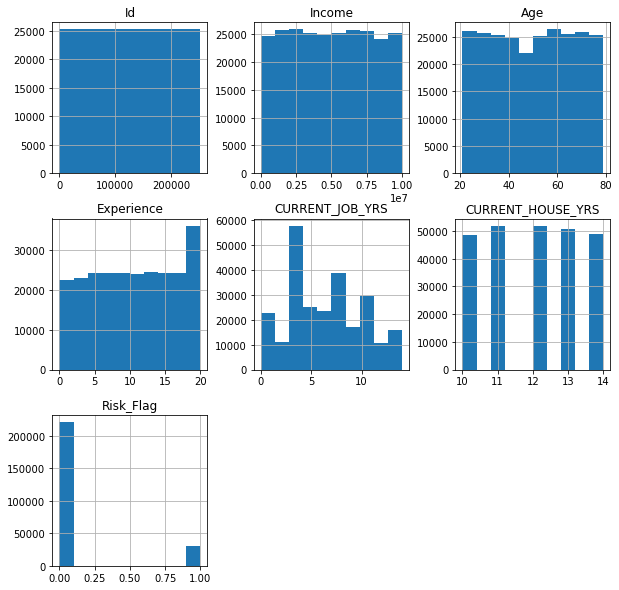

In [9]:
# Checking data distribution through histogram
df.hist(figsize= (10,10))
plt.show()

In [10]:
# Characteristic of Response variable
print(df["Risk_Flag"].value_counts())
print(df['Risk_Flag'].unique())

0    221004
1     30996
Name: Risk_Flag, dtype: int64
[0 1]


<AxesSubplot:xlabel='Risk_Flag', ylabel='Income'>

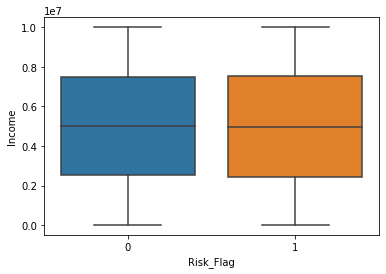

In [11]:
import seaborn as sns

sns.boxplot(data=df, x='Risk_Flag', y='Income')

<AxesSubplot:xlabel='Risk_Flag', ylabel='Age'>

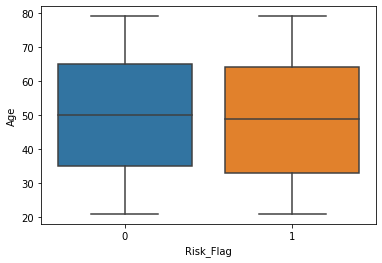

In [12]:
sns.boxplot(data= df, x= 'Risk_Flag', y= 'Age')

<AxesSubplot:xlabel='Risk_Flag', ylabel='Experience'>

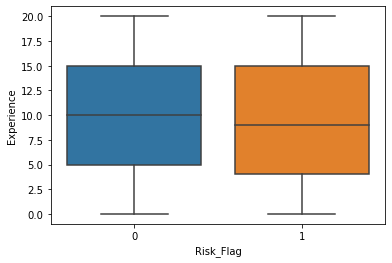

In [13]:
sns.boxplot(data = df, x = 'Risk_Flag', y= 'Experience')

In [14]:
# Checking the correlation b/w the variables

fig, ax = plt.subplots(figsizee = (12,8))
corr_matrix = df.corr()
corr_heatmap = sns.heatmap(corr_matrix, annot=True, ax=ax, annot_kws={"size": 14})
plt.show()


TypeError: __init__() got an unexpected keyword argument 'figsizee'

In [15]:
def categorical_value_plot(features):
    print(df[features].value_counts())
    sns.countplot(data = df, x = features)  

single     226272
married     25728
Name: Married/Single, dtype: int64


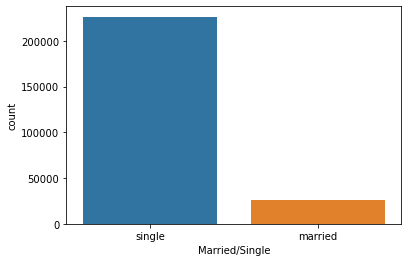

In [16]:
categorical_value_plot('Married/Single')

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64


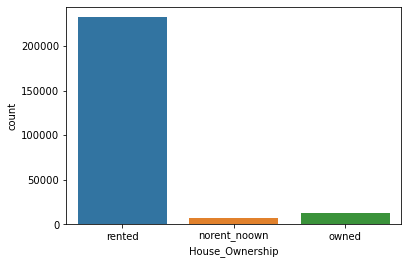

In [17]:
categorical_value_plot('House_Ownership')

no     176000
yes     76000
Name: Car_Ownership, dtype: int64


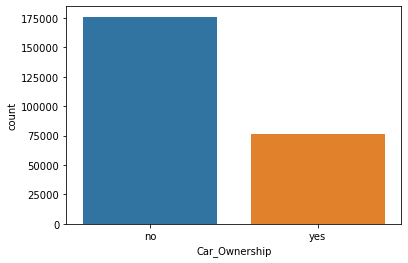

In [18]:
categorical_value_plot('Car_Ownership')

In [19]:
df['Profession'].value_counts().sort_values(ascending= False)

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [20]:
df['CITY'].value_counts().sort_values(ascending= False)

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [21]:
df['STATE'].value_counts().sort_values(ascending= False)[:10]

Uttar_Pradesh     28400
Maharashtra       25562
Andhra_Pradesh    25297
West_Bengal       23483
Bihar             19780
Tamil_Nadu        16537
Madhya_Pradesh    14122
Karnataka         11855
Gujarat           11408
Rajasthan          9174
Name: STATE, dtype: int64

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

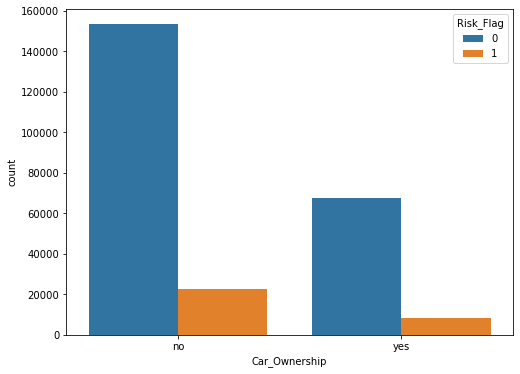

In [22]:
    
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(data = df, x='Car_Ownership', hue= 'Risk_Flag', ax = ax )

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

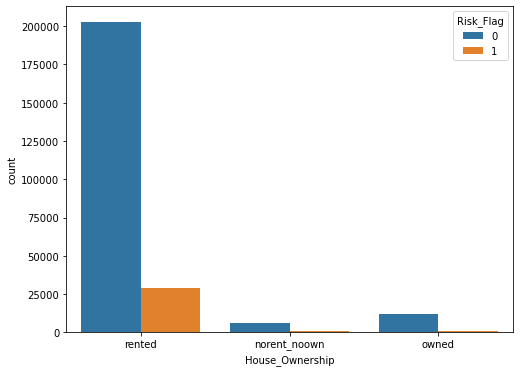

In [23]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(data = df, x= 'House_Ownership', hue='Risk_Flag')

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

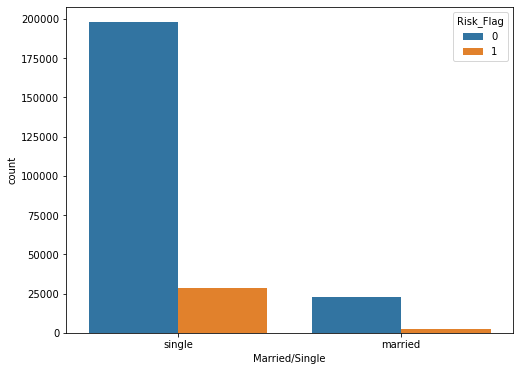

In [24]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(data=df, x='Married/Single', hue='Risk_Flag')

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

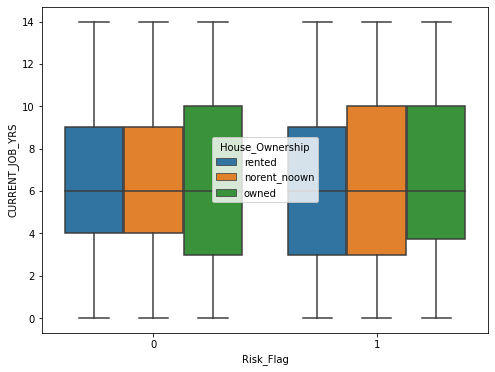

In [25]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data= df, x='Risk_Flag', y='CURRENT_JOB_YRS', hue='House_Ownership', ax=ax)

#The plot below shows that majority of the people who do not default are either between 4-9 years of experience who rent or do not rent or own a house or between 3-10 years of experience who own a house and have a higher concentration around 6 years of experience.
# People who tend to default are either between 3-9 years of experience who rent a place, or 3-10 years of experience who do not rent or own, and between 4-10 years of experience who own a gouse and mostly default with 6 years job experience 

In [26]:
# Data Preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce



In [27]:
le = LabelEncoder() 
for col in ['Married/Single', 'Car_Ownership']: df[col] = le.fit_transform(df[col])


In [28]:
ohe = OneHotEncoder(sparse=False)
df['House_Ownership'] = ohe.fit_transform(df['House_Ownership'].values.reshape(-1,1))

In [29]:
high_card_features = ['Profession', 'CITY', 'STATE']
count_encoder = ce.CountEncoder()
count_encoded = count_encoder.fit_transform(df[high_card_features])
df = df.join(count_encoded.add_suffix("_count"))

df = df.drop(labels=['Profession', 'CITY', 'STATE'], axis = 1)

In [34]:
# Train & Test Data
x = df.drop("Risk_Flag", axis = 1)
y= df["Risk_Flag"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify=y, random_state=7)

In [35]:
print(y_train)

181180    1
103646    0
205648    0
36551     0
146287    0
         ..
43125     0
248640    0
118417    0
110176    0
238347    0
Name: Risk_Flag, Length: 201600, dtype: int64


In [36]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [37]:
rfc = RandomForestClassifier(criterion='gini', bootstrap =True, random_state= 100)
smote_sample = SMOTE(random_state=9)
pipeline = Pipeline(steps=[['smote', smote_sample],
                           ['classifier', rfc]])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("TEST SCORES")
print(f"Recall: {round(recall_score(y_test, y_pred)*100, 4)}")
print(f"Precision: {round(precision_score(y_test, y_pred)*100, 4)}")
print(f"F1_Score: {round(f1_score(y_test, y_pred)*100, 4)}")
print(f"Accuracy_Score: {round(accuracy_score(y_test, y_pred)*100, 4)}")
print(f"AUC_Score: {round(roc_auc_score(y_test, y_pred)*100, 4)}")

TEST SCORES
Recall: 54.2668
Precision: 53.9362
F1_Score: 54.101
Accuracy_Score: 88.6746
AUC_Score: 73.8835
